# Tutorial 8

The purpose of this question is to simulate the trajectory of an object under gravity. The question adapts and extends the techniques for solving differential equations explained in the 'Linear Oscillator' example. Make sure you can understand that example before attempting this question.

See the accompanying file `gravity_notes.ipynb` for a derivation of the equations of motion of an object moving under gravity.

### Part 1

First you will consider the one-dimensional case of a projectile fired vertically from the surface of The Earth. Does it fall back to earth or does it escape into space? 

A projectile at distance $x$ from the centre of the Earth and moving at a velocity $v$ in a vertical direction moves according to the following coupled pair of differential equations:

$$\begin{align*}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= -\frac{Gm_\mathrm{e}}{x^2}
\end{align*}$$

Determine the update rule which calculates $x_{i+1}$ and $v_{i+1}$ from $x_{i}$ and $v_{i}$, then adapt the linear oscillator example to calculate the trajectory of the projectile. Plot the trajectory as distance `x` against time `t` and determine at what time the projectile returns to The Earth's surface.

| | |
|---|---|
|duration | $10000~\mathrm{s}$|
|time step | $1~\mathrm{s}$|
|mass of Earth | $5.972 \times 10^{24}~\mathrm{kg}$|
|radius of Earth | $6.371~\times 10^6~\mathrm{m}$ |
|initial velocity | $5000~\mathrm{m}/\mathrm{s}$ |
|gravitational constant | $6.674 \times 10^{-11}~\mathrm{Nm}^2/\mathrm{kg}^2$ |

**Hint** you should exit the loop (using the `break` keyword) once the projectile's position falls below the surface of the earth.

[5000.         4990.18046797 4980.37633067 ...    0.            0.
    0.        ]


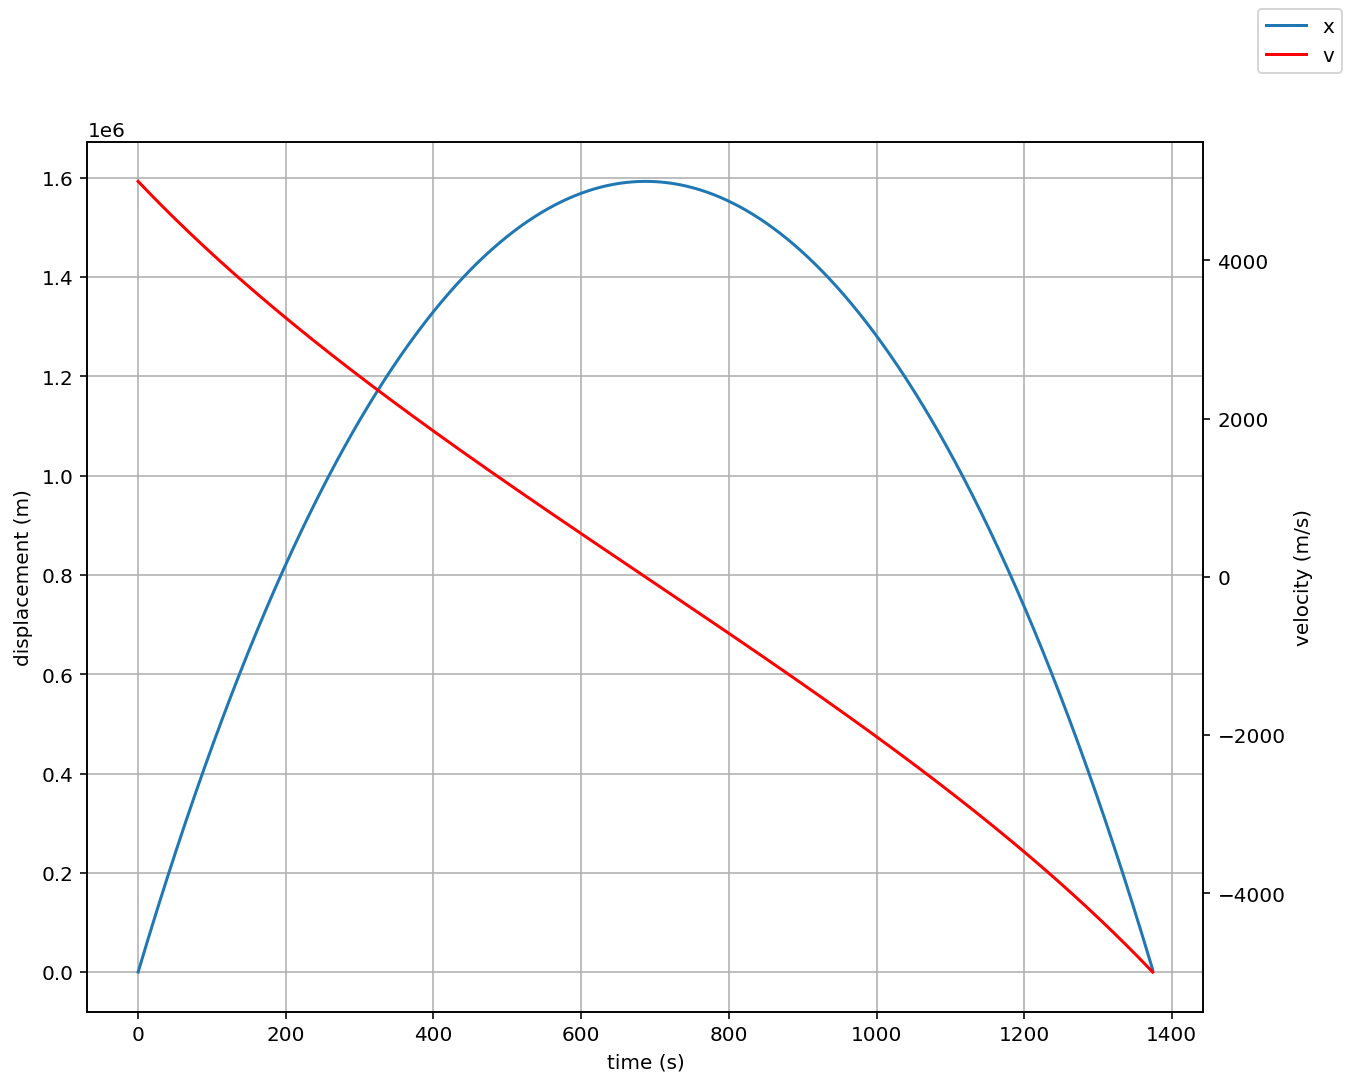

In [39]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

m_e = 5.972 * 10 **(24)
r_e = 6.371 * 10 **(6)
G = 6.674 * 10 **(-11)
del_t = 1
t_max = 10000
time = np.arange(0,t_max,del_t)

n_steps = len(time)

x = np.zeros(n_steps)
v = np.zeros(n_steps)

#initial conditions
x[0] = 0
v[0] = 5000

for i in range(n_steps - 1):
    if x[i] >= 0:
        x[i+1] = (x[i] + v[i]*del_t)
        v[i+1] = v[i] - (G*m_e/((r_e+x[i])**2)) * del_t
    else:
        time_lim = time[0:i]
        x_plot = x[0:i]
        v_plot = v[0:i]
        break
 
# print(x)
print(v)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()
ax.plot(time_lim, x_plot, label="x")
ax.set_ylabel("displacement (m)")
ax.set_xlabel("time (s)")
ax_r = ax.twinx() # allows us to have separate y-axes on left and right
ax_r.plot(time_lim, v_plot, "r" ,label="v")
ax_r.set_ylabel("velocity (m/s)")
fig.legend()
ax.grid(True)
plt.show()

### Part 2

By experimenting with different values of $v_0$, find an estimate of The Earth's escape velocity (the minimum initial velocity that results in the projectile escaping into space).

(You will have to increase the duration of the simulation. You might need to increase the time step $\Delta t$ in order for the simulation to run in a reasonable time - but this will decrease the accuracy. Experiment!)

No handles with labels found to put in legend.


140.22 140.23
0.00140222837070547 0.001402289228630248


124.75999999999999 124.77
0.0012476384485233965 0.0012476832698876425


112.89 112.89
0.0011288865570574997 0.0011289208458036399


103.46000000000001 103.46000000000001
0.0010346167902878156 0.0010346438082522989


95.78 95.79
0.0009578283608682605 0.0009578501593695617


89.4 89.4
0.0008939684481623627 0.0008939863795526659


83.99 84.0
0.0008399468741968889 0.0008399618648084479


79.36 79.36
0.0007935914632694475 0.0007936041681075165


75.33 75.33
0.0007533300485761207 0.0007533409434127926


71.8 71.8
0.0007179961981918447 0.0007180056365132243


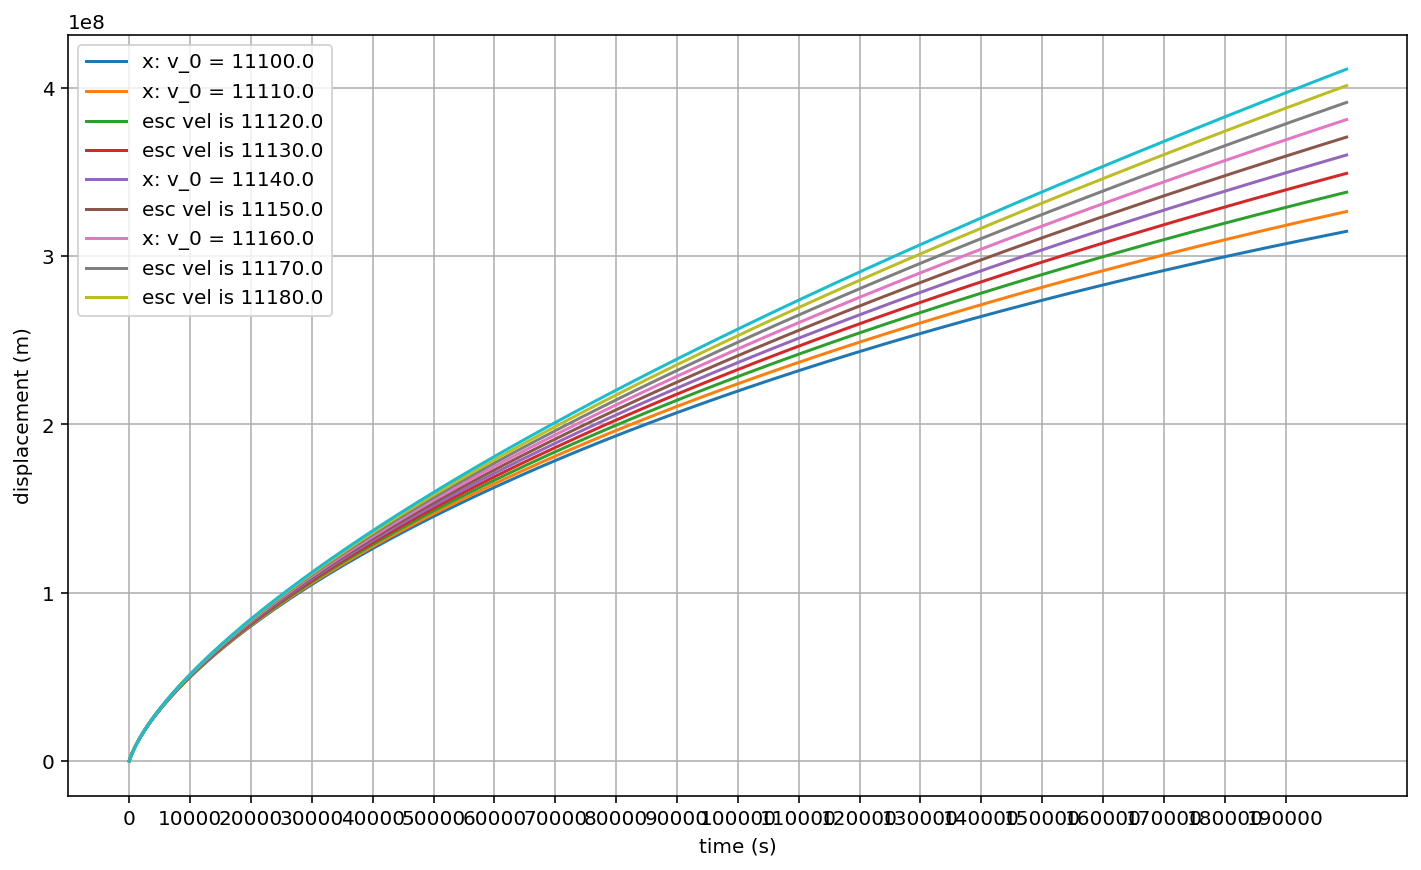

In [68]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import numpy as np
import math as m
import matplotlib.pyplot as plt

m_e = 5.972 * 10 **(24)
r_e = 6.371 * 10 **(6)
G = 6.674 * 10 **(-11)
del_t = 1
t_max = 200000
time = np.arange(0,t_max,del_t)

n_steps = len(time)

x = np.zeros(n_steps)
v = np.zeros(n_steps)

def check_straightline(xcoor, ycoor, prec):
    x0 = xcoor[-10]; y0 = ycoor[-10]
    x1 = xcoor[-9] ; y1 = ycoor[-9]
    x2 = xcoor[-2] ; y2 = ycoor[-2]
    x3 = xcoor[-1] ; y3 = ycoor[-1]
    s1 = (y1-y0)/(x1-x0)
    s2 = (y3-y2)/(x3-x2)
    print(np.round(s1, prec)*10**5, np.round(s2, prec)*10**5)
    print(s1,s2)
#     print(x1,x2)
#     print(y1, y2)
    if np.round(s1, prec)*10**5 == np.round(s2, prec)*10**5:
        return True
    else:
        return False
    
def plot2(v_init, v_final, steps):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    x[0] = 0
    for initvel in range(v_init,v_final,steps):
        v[0] = initvel
        for i in range(n_steps - 1):
            if x[i] >= 0:
                x[i+1] = (x[i] + v[i]*del_t)
                v[i+1] = v[i] - (G*m_e/((r_e+x[i])**2)) * del_t
            else:
                x[i+1] = None
                v[i+1] = None
        checkstraight = check_straightline(x , time, 7) 
        plt.xticks(np.arange(0, t_max, step = 10000))
        plt.ylabel("displacement (m)")
        plt.xlabel("time (s)")
        plt.legend(loc = 'best')
        plt.grid(True)
        if checkstraight is True:
            plt.plot(time,x, label = "esc vel is {}".format(v[0]))
        else:
            plt.plot(time, x, label="x: v_0 = {}".format(v[0]))
            
    plt.show()
            
plot2(11100, 11200 , 10)
#literature value(from internet): 11186 ms^-1
#e11120 m

### Part 3

The previous example only considered motion in one dimension. In this part you will extend to two dimensions.

Consider a projectile fired horizontally from the surface of the earth. Its position $\mathbf{x} = (x_1, x_2)$ relative to the centre of The Earth and its velocity is $\mathbf{v} = (v_1, v_2)$. The distance between the projectile and the centre of The Earth is $r = \sqrt{x_1^2 + x_2^2}$.

The vector equations governing its motion are:
$$\begin{align*}
\frac{d\mathbf{x}}{dt} &= \mathbf{v}\\
\frac{d\mathbf{v}}{dt} &= -\frac{Gm_\mathrm{e}}{r^3}\mathbf{x}
\end{align*}$$

Defining a timestep $\Delta t$:

$$ \begin{align*}
\mathbf{x}_{i+1} &= \mathbf{x}_i + \mathbf{v}_i\Delta t\\
\mathbf{v}_{i+1} &= \mathbf{v}_i -\frac{Gm_\mathrm{e}}{r^3}\mathbf{x_i}\Delta t
\end{align*}$$

Since $\mathbf{x}_i$ and $\mathbf{x}_i$ and are 2-dimensional vectors, `x` and `v` are now 2 by `n_steps` numpy arrays, where `x[0,i]` and `x[1,i]` are $x_1$ and $x_2$ co-ordinates of the projectile at timestep `i`.

```
x = np.zeros((2, n_steps))
v = np.zeros((2, n_steps))
```

The update step for the position `x` becomes:

```
x[:,i+1] = x[:,i] + v[:,i] * delta_t
```

Determine the code for the update step for the velocity `v` (hint: first calculate the value of the scalar quantity `r`).

Use this code to write a simulation of the trajectory of the projectile. Create three plots of its trajectory, $x_1$ against $t$, $x_2$ against $t$, and $x_1$ against $x_2$.


| | |
|---|---|
|duration | $10000~\mathrm{s}$|
|time step | $1~\mathrm{s}$|
|mass of Earth | $5.972 \times 10^{24}~\mathrm{kg}$|
|radius of Earth | $6.371~\times 10^6~\mathrm{m}$ |
|initial velocity (horizontal) | $10000~\mathrm{m}/\mathrm{s}$ |
|initial velocity (vertical) | $0~\mathrm{m}/\mathrm{s}$ |
|gravitational constant | $6.674 \times 10^{11}~\mathrm{Nm}^2/\mathrm{kg}^2$ |



[[0.000e+00 1.000e+04 2.000e+04 ... 9.997e+07 9.998e+07 9.999e+07]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
[[10000. 10000. 10000. ... 10000. 10000. 10000.]
 [    0.     0.     0. ...     0.     0.     0.]]


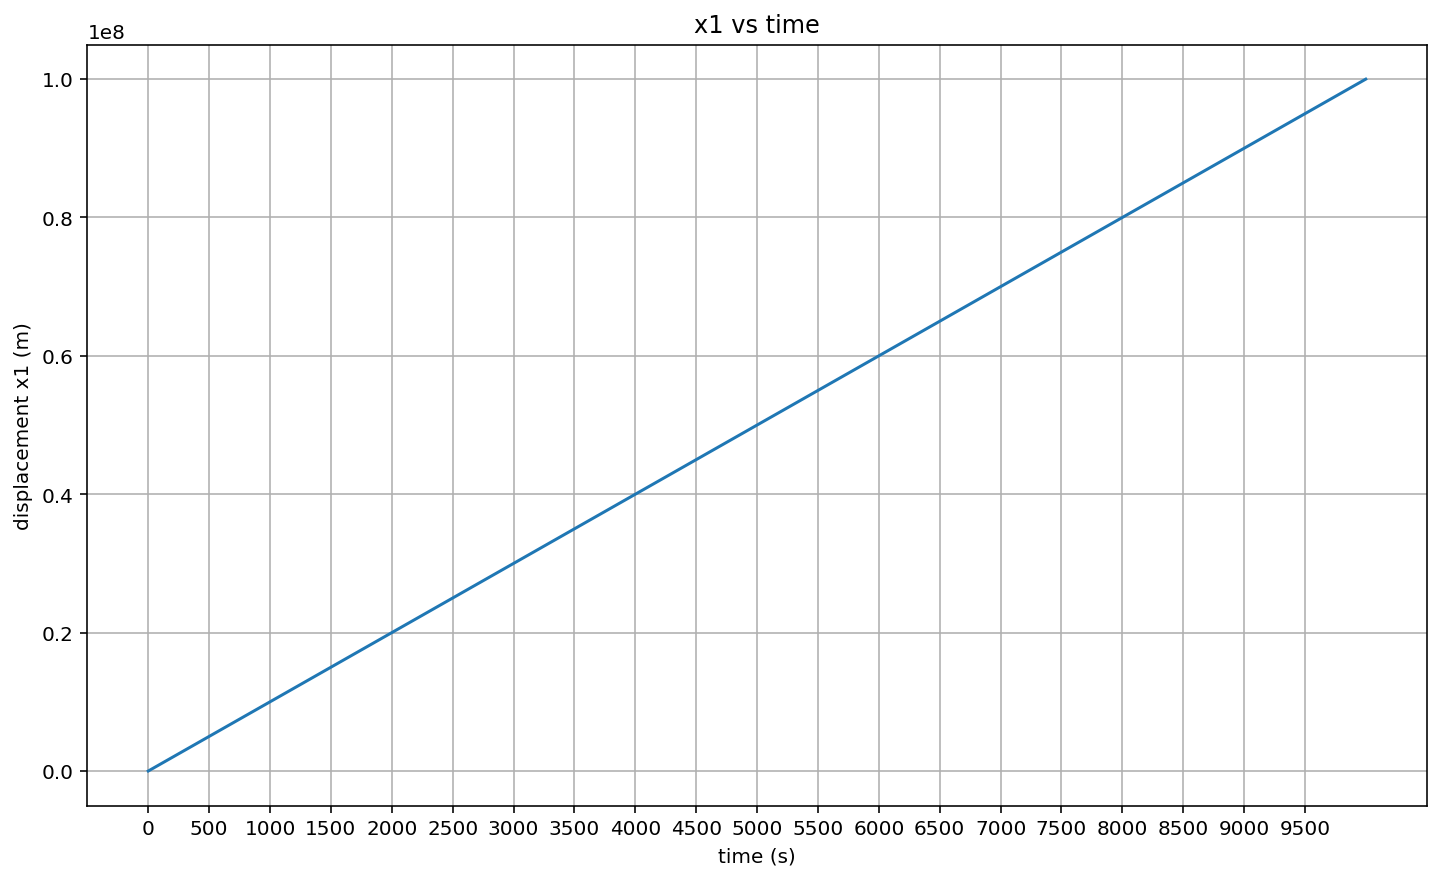

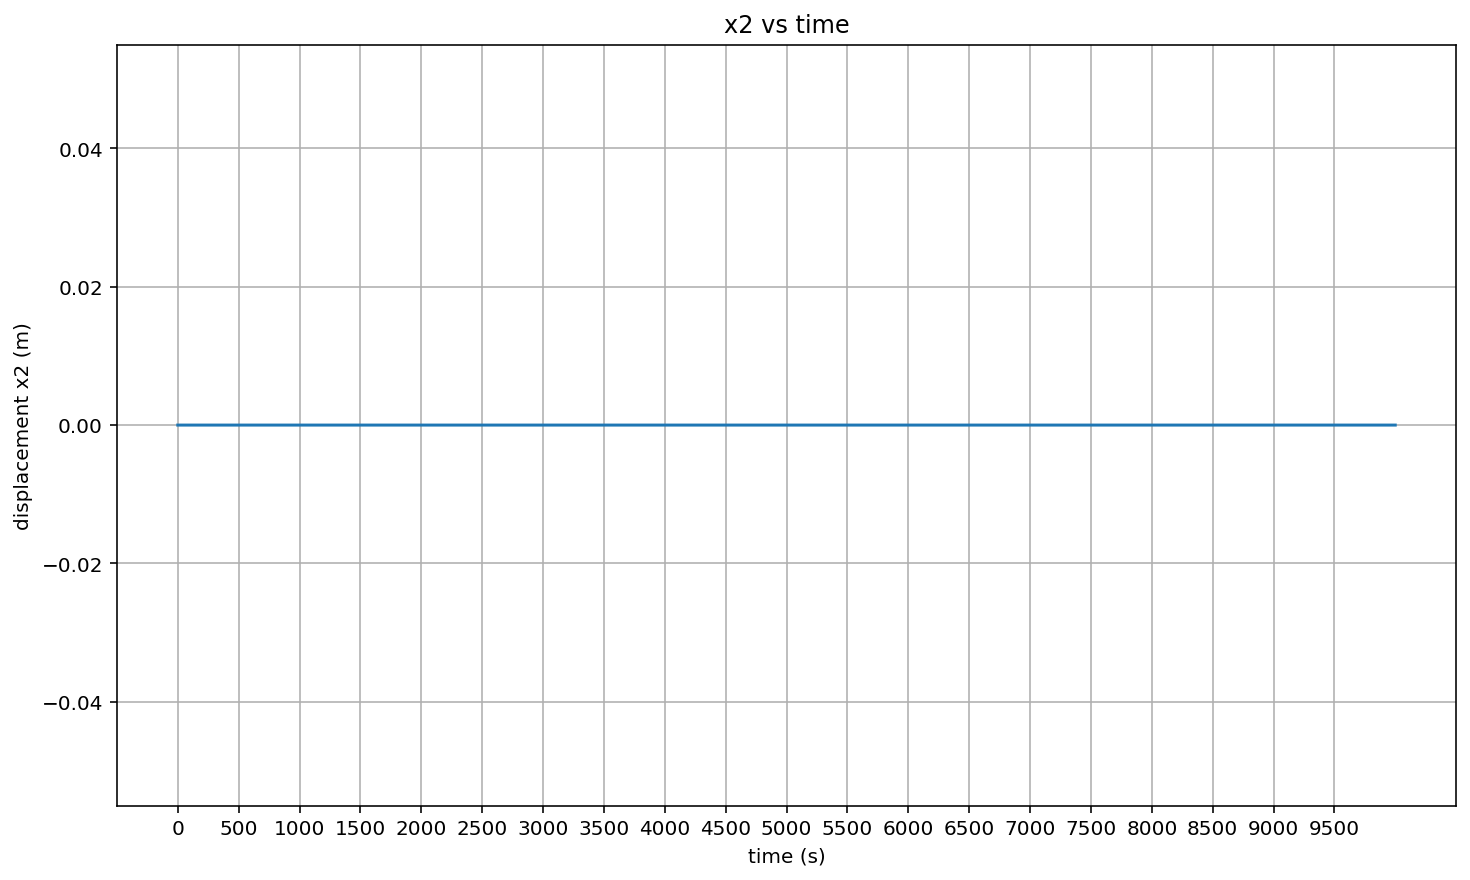

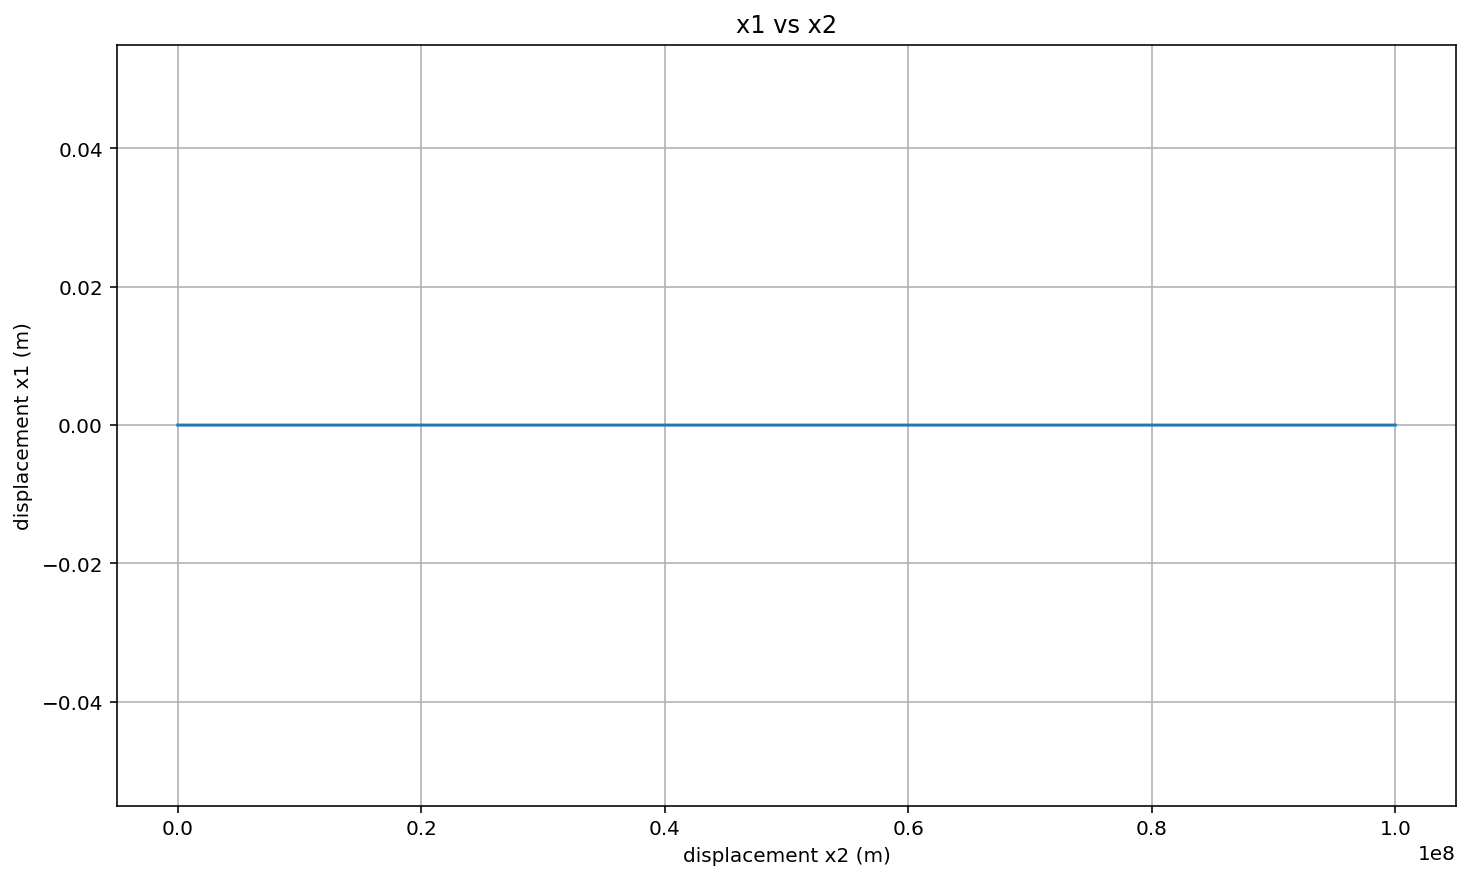

In [10]:
import numpy as np
import math as m
import matplotlib.pyplot as plt


m_e = 5.972 * 10 **(24)
r_e = 6.371 * 10 **(6)
G = 6.674 * 10 **(-11)
del_t = 1
t_max = 10000
time = np.arange(0,t_max,del_t)

n_steps = len(time)
#setting numpy arrays
x = np.zeros((2, n_steps))
v = np.zeros((2, n_steps))

#initial conditions
#1 --> horizontal
#2 --> vertical
v[0][0] = 10000
v[1][0] = 0
#print(v)
for i in range(len(time)-1):
    r = m.sqrt((x[0][i])**2 + (x[1][i])**2)
    x[1:,i+1] = (x[1:,i] + v[1:,i] * del_t) 
    v[1:,i+1] = v[1:,i] - ((G*m_e)/((r+r_e)**3))*x[1:,i]*del_t
    v[0][i+1] = 10000
    x[0][i+1] = x[0][i]+v[0][i]*del_t
    
#     """"
#     Gravity does not have affect on the x component
#     """"
    
#     x[i+1] = (x[i] + v[i]*del_t)
#     v[i+1] = v[i] - (G*m_e/((r_e+x[i])**2)) * del_t
#     print(r)
print(x)
print(v)
   
def plot_x1vt():
    plt.plot(time, x[0][:])
    plt.xticks(np.arange(0, t_max, step = 500))
#     plt.yticks(np.arange(0,max(x[0,:])))
    plt.ylabel("displacement x1 (m)")
    plt.xlabel("time (s)")
    plt.title("x1 vs time")
    plt.grid(True)
    plt.show()
    
def plot_x2vt():
    plt.plot(time, x[1][:])
    plt.xticks(np.arange(0, t_max, step = 500))
#     plt.yticks(np.arange(0, max(x[1,:])))
    plt.ylabel("displacement x2 (m)")
    plt.xlabel("time (s)")
    plt.title("x2 vs time")
    plt.grid(True)
    plt.show()
    
def plot_x1vx2():
    plt.plot(x[0,:], x[1,:])
#     plt.yticks(np.arange(0, max(x[1,:])))
#     plt.xticks(np.arange(0, max(x[0,:])))
    plt.ylabel("displacement x1 (m)")
    plt.xlabel("displacement x2 (m)")
    plt.title("x1 vs x2")
    plt.grid(True)
    plt.show()
    
plot_x1vt()
plot_x2vt()
plot_x1vx2()

### Part 4

The kinetic energy (in Joules) of the projectile is given by the equation

$$ E_\mathrm{K} = \frac{1}{2}{mv}^2$$

where $m$ is the mass of the projectile and $v$ is the magnitude of its velocity.

Its potential energy (in Joules) is given by:

$$ E_\mathrm{P} = -\frac{Gm_\mathrm{e}mv}{r}$$

where $r$ is the distance between the projectile and the centre of The Earth.

Use array slicing and vector operations to calculate one-dimensional arrays `E_K` and `E_P` representing the kinetic and potential energies of the projectile (i.e. `E_K[i]` is the kinetic energy at time point `i`). Plot `E_K`, `E_P` and the total energy `E_K` + `E_P` on the same graph. Add suitable x and y labels and a legend.


[5000.         4990.18046797 4980.37633067 ...    0.            0.
    0.        ]
[ 3.12801193e+13  3.11942067e+13  3.11085727e+13 ... -3.10586724e+13
 -3.11439485e+13 -3.12295008e+13]


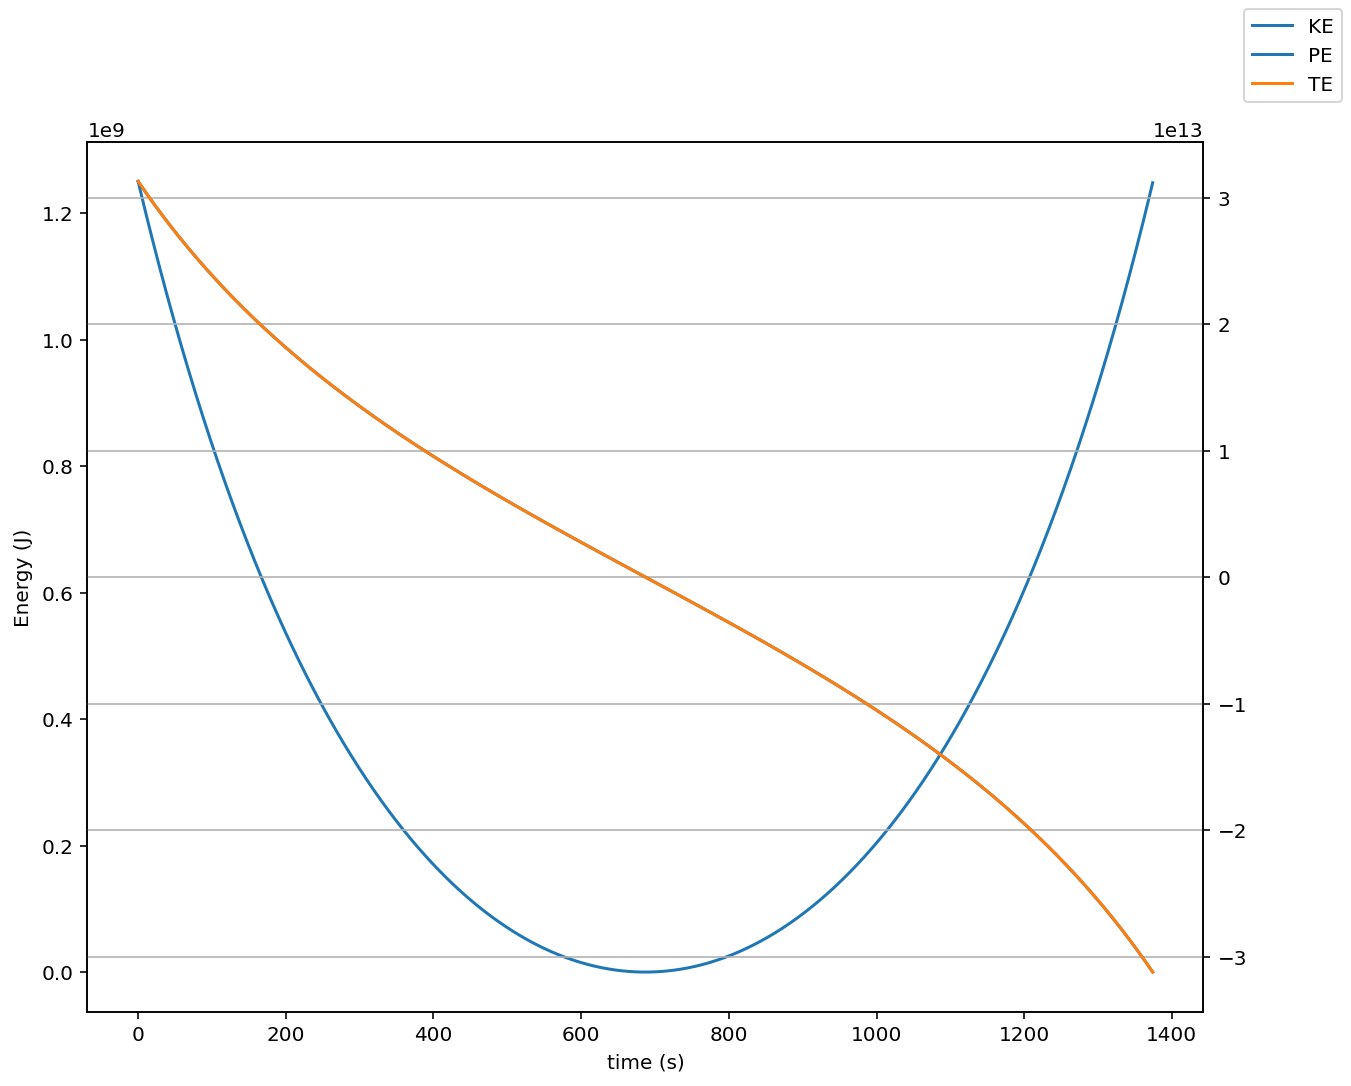

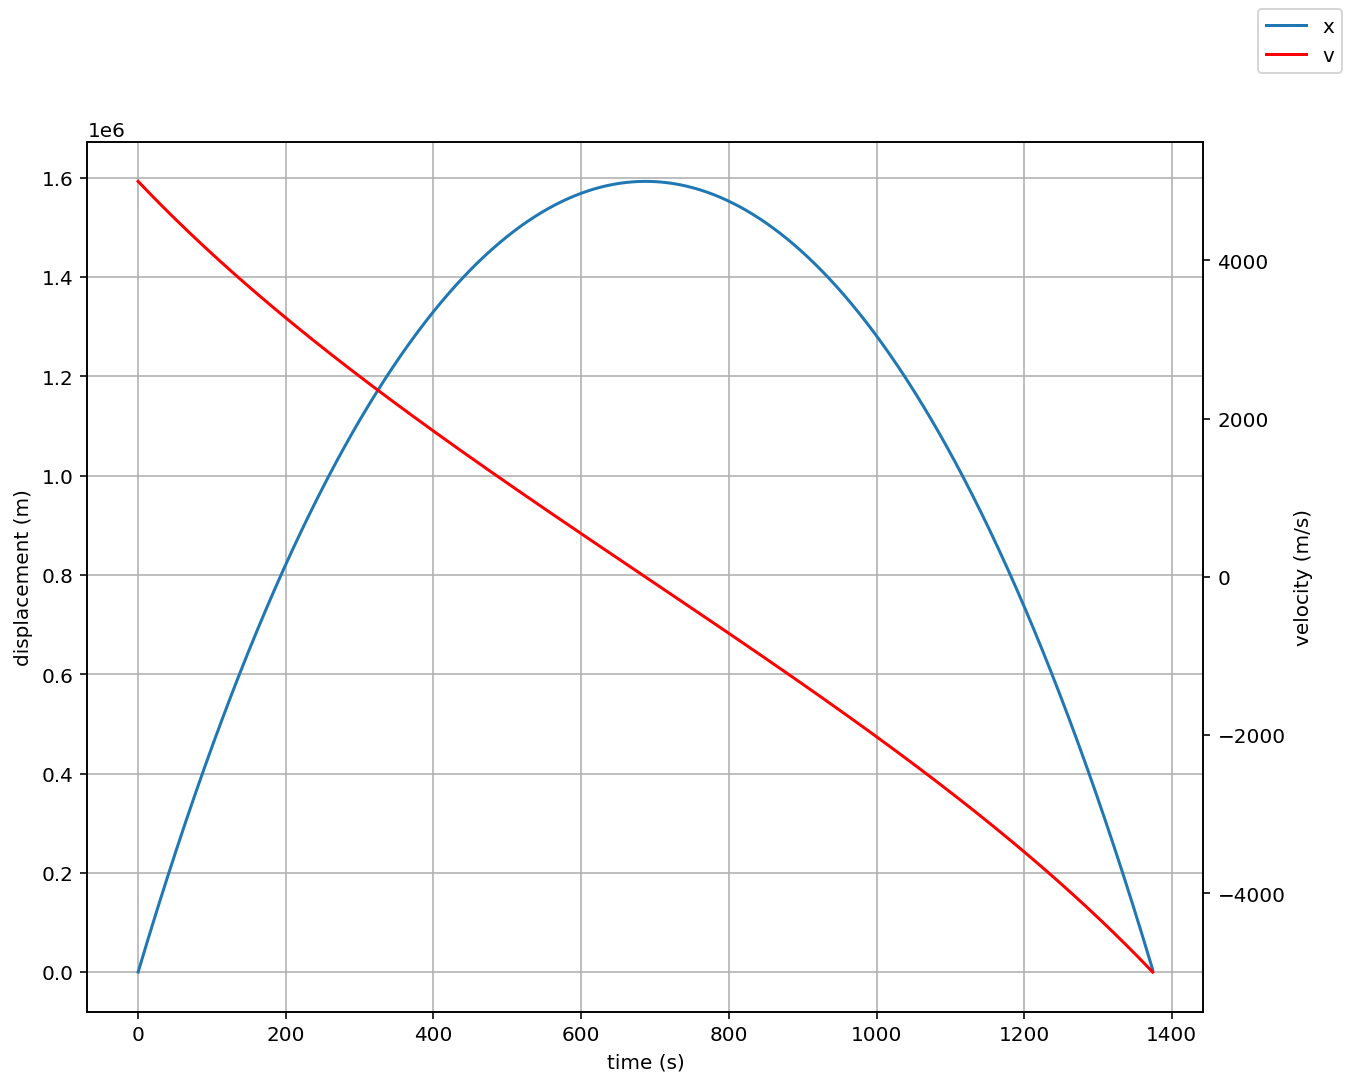

In [48]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt


m_e = 5.972 * 10 **(24)
G = 6.674 * 10 **(-11)
r_e = 6.371 * 10 **(6)
del_t = 1
t_max = 10000
time = np.arange(0,t_max,del_t)
n_steps = len(time)
m = 100


x = np.zeros(n_steps)
v = np.zeros(n_steps)

#initial conditions
x[0] = 0
v[0] = 5000


E_K = np.zeros(n_steps)
E_P = np.zeros(n_steps)
T_E = np.zeros(n_steps)


for i in range(n_steps-1):
    if x[i]>=0:
        x[i+1] = (x[i] + v[i]*del_t)
        v[i+1] = v[i] - (G*m_e/((r_e+x[i])**2)) * del_t
        E_K[i] = (m*v[i]**2)/2
        E_P[i] = abs((G*m_e*m*v[i])/(x[i]+r_e)
        T_E[i] = E_K[i] + E_P[i]
    else:
        time_lim = time[0:i]
        x_plot = x[0:i]
        v_plot = v[0:i]
        KE = E_K[0:i]
        PE = E_P[0:i]
        TE = T_E[0:i]
        break
print(v)
print(PE)
fig2 = plt.figure(figsize = (10,8))
ax2 = fig2.add_subplot()
ax2.plot(time_lim, KE, label = "KE")
ax_r2 = ax2.twinx()
ax_r2.plot
ax_r2.plot(time_lim, PE, label = "PE")
ax_r2.plot(time_lim, TE, label = "TE")
ax2.set_ylabel("Energy (J)")
ax2.set_xlabel("time (s)")
fig2.legend()
plt.grid(True)
plt.show()


fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()
ax.plot(time_lim, x_plot, label="x")
ax.set_ylabel("displacement (m)")
ax.set_xlabel("time (s)")
ax_r = ax.twinx() # allows us to have separate y-axes on left and right
ax_r.plot(time_lim, v_plot, "r" ,label="v")
ax_r.set_ylabel("velocity (m/s)")
fig.legend()
ax.grid(True)
plt.show()

